In [7]:
import json
from typing import List, Dict

import numpy as np
import numpy.typing as npt
from matplotlib import pyplot as plt
from seaborn import heatmap
from sklearn.metrics import confusion_matrix

import spectrum_painting_data as sp_data
import spectrum_painting_training as sp_training
from spectrum_painting_result import SpectrumPaintingResult
from training.spectrum_painting import augment_spectrogram, downsample_spectrogram, paint_spectrogram

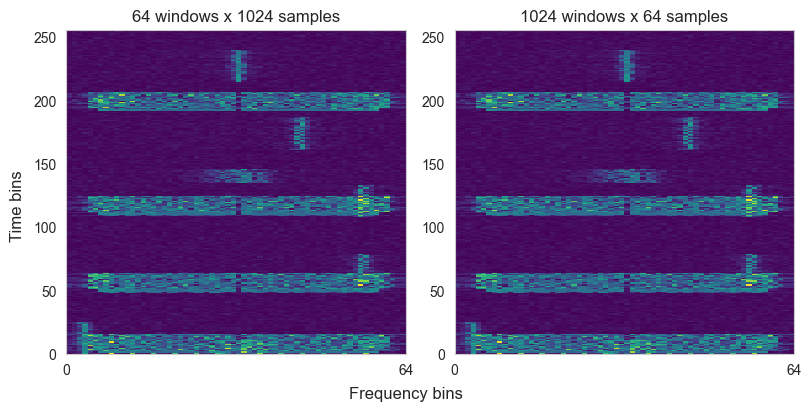

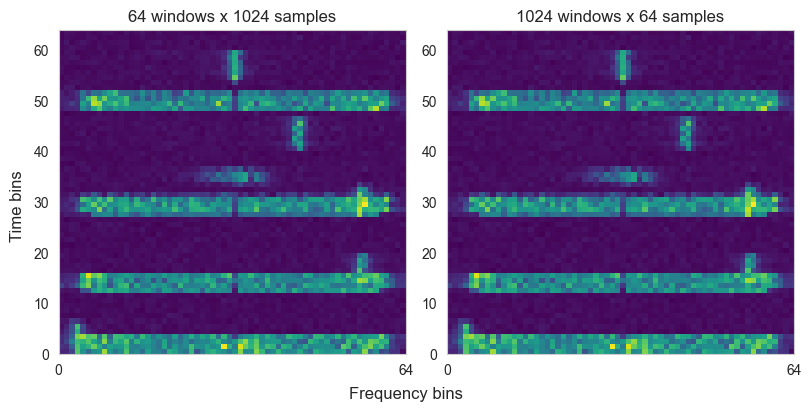

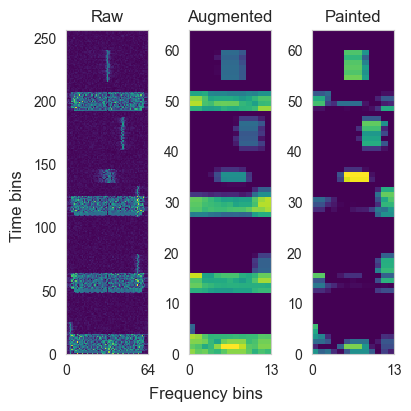

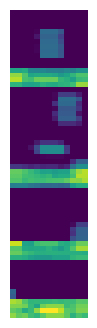

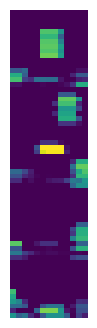

In [8]:
classes = ["ZBW"]
snr = 15

spectrum_painting_options = sp_training.SpectrumPaintingTrainingOptions(
    downsample_resolution=64,
    k=3,
    l=16,
    d=4
)

high_freq_resolution_spec = sp_data.load_spectrograms(data_dir="data/numpy",
                                                      classes=classes,
                                                      snr_list=[snr],
                                                      windows_per_spectrogram=256,
                                                      window_length=256,
                                                      nfft=64).get(snr)[0].values

high_time_resolution_spec = sp_data.load_spectrograms(data_dir="data/numpy",
                                                      classes=classes,
                                                      snr_list=[snr],
                                                      windows_per_spectrogram=256,
                                                      window_length=256,
                                                      nfft=64).get(snr)[0].values

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(8, 4), constrained_layout=True)


def plot_spectrogram(spectrogram: npt.NDArray, index: int, name: str):
    plt.subplot(1, 2, index)
    plt.pcolormesh(spectrogram, cmap='viridis')
    plt.title(name)
    plt.xticks((0, spectrogram.shape[1]))
    plt.xticks()


plot_spectrogram(high_freq_resolution_spec, 1, "64 windows x 1024 samples")
plot_spectrogram(high_time_resolution_spec, 2, "1024 windows x 64 samples")

fig.supxlabel("Frequency bins")
fig.supylabel("Time bins")
plt.show()

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(8, 4), constrained_layout=True)

plot_spectrogram(downsample_spectrogram(high_freq_resolution_spec, 64), 1, "64 windows x 1024 samples")
plot_spectrogram(downsample_spectrogram(high_time_resolution_spec, 64), 2, "1024 windows x 64 samples")

fig.supxlabel("Frequency bins")
fig.supylabel("Time bins")
plt.show()

spec = sp_data.load_spectrograms(data_dir="data/numpy",
                                 classes=classes,
                                 snr_list=[snr],
                                 windows_per_spectrogram=256,
                                 window_length=256,
                                 nfft=64).get(snr)[0].values

fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(4, 4), constrained_layout=True)


def plot_spectrogram(spectrogram: npt.NDArray, index: int, name: str):
    plt.subplot(1, 3, index)
    plt.pcolormesh(spectrogram, cmap='viridis')
    plt.title(name)
    plt.xticks((0, spectrogram.shape[1]))
    plt.xticks()


plot_spectrogram(spec.clip(max=0.04), index=1, name="Raw")

downsampled = downsample_spectrogram(spectrogram=spec, resolution=64)

augmented = augment_spectrogram(spectrogram=downsampled, k=3, l=16, d=4)
plot_spectrogram(augmented, index=2, name="Augmented")

painted = paint_spectrogram(downsampled, augmented)
plot_spectrogram(painted, index=3, name="Painted")

# fig.tight_layout()
fig.supxlabel("Frequency bins")
fig.supylabel("Time bins")
plt.show()

plt.figure(figsize=(1, 4))
plt.pcolormesh(augmented, cmap='viridis')
plt.axis("off")
plt.yticks(None)
plt.show()

plt.figure(figsize=(1, 4))
plt.pcolormesh(painted, cmap='viridis')
plt.axis("off")
plt.yticks(None)
plt.show()

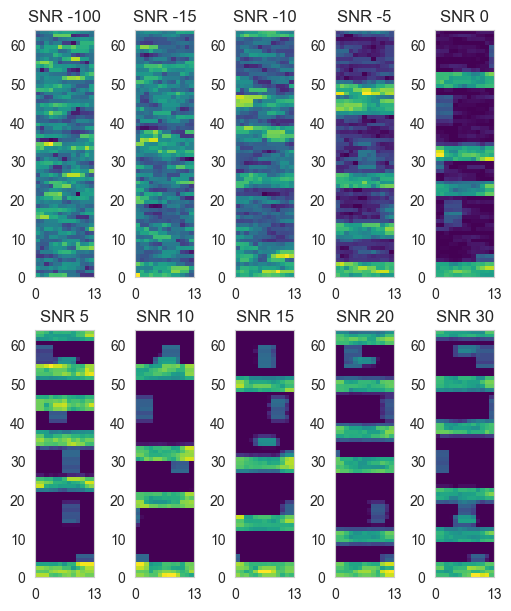

In [9]:
snr_list = [-100, -15, -10, -5, 0, 5, 10, 15, 20, 30]

spectrogram = sp_data.load_spectrograms(data_dir="data/numpy",
                                        classes=["ZBW"],
                                        snr_list=snr_list,
                                        windows_per_spectrogram=256,
                                        window_length=256,
                                        nfft=64)

fig, axes = plt.subplots(nrows=2, ncols=5, figsize=(5, 6), constrained_layout=True)


def plot_spectrogram(spectrogram: npt.NDArray, index: int, name: str):
    plt.subplot(2, 5, index)
    plt.pcolormesh(spectrogram, cmap='viridis')
    plt.title(name)
    plt.xticks((0, spectrogram.shape[1]))
    plt.xticks()


for i, snr in enumerate(snr_list):
    spec = spectrogram[snr][0].values

    downsampled = downsample_spectrogram(spectrogram=spec, resolution=64)
    augmented = augment_spectrogram(spectrogram=downsampled, k=3, l=16, d=4)

    plot_spectrogram(augmented, i + 1, f"SNR {snr}")

# Read the results and create plots from notebook_spectrum_painting

In [10]:
file_name = "results-1-iteration-new.json"
result_list: List[SpectrumPaintingResult] = []
results: Dict[int, SpectrumPaintingResult] = {}

with open(f"output/{file_name}", "r") as f:
    result_list = json.load(f)["results"]
    result_list = [SpectrumPaintingResult.from_dict(r) for r in result_list]
    for result in result_list:
        results[result.snr] = result

Full model


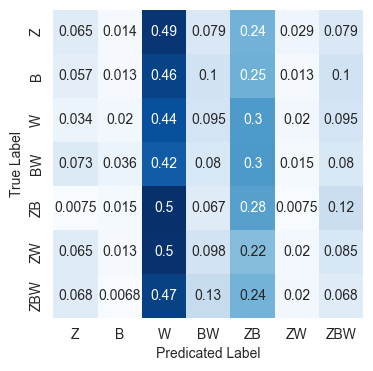

Lite model


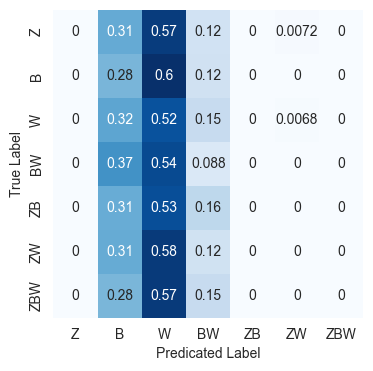

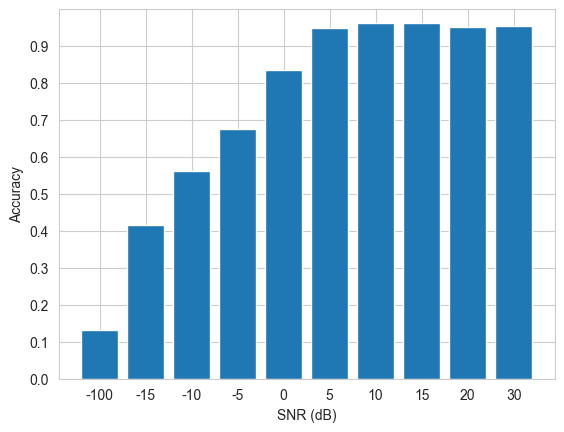

SNR -100
Accuracy = 0.1309055118110236


/var/folders/81/3wz7wxg90f3df6qvy1xbf71m0000gn/T/ipykernel_81843/3982928966.py:15: RuntimeWarning: invalid value encountered in divide
  cm = (cm.astype(np.float32) / row_sums)


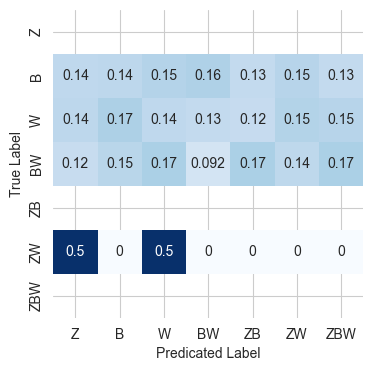

SNR -15
Accuracy = 0.41723800195886385


/var/folders/81/3wz7wxg90f3df6qvy1xbf71m0000gn/T/ipykernel_81843/3982928966.py:15: RuntimeWarning: invalid value encountered in divide
  cm = (cm.astype(np.float32) / row_sums)


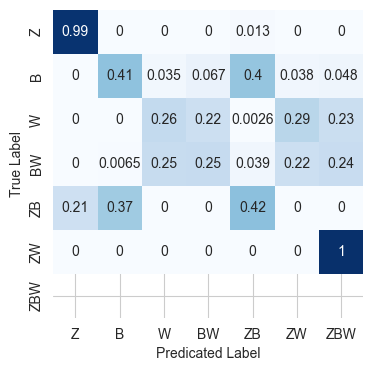

SNR -10
Accuracy = 0.5619596541786743


/var/folders/81/3wz7wxg90f3df6qvy1xbf71m0000gn/T/ipykernel_81843/3982928966.py:15: RuntimeWarning: invalid value encountered in divide
  cm = (cm.astype(np.float32) / row_sums)


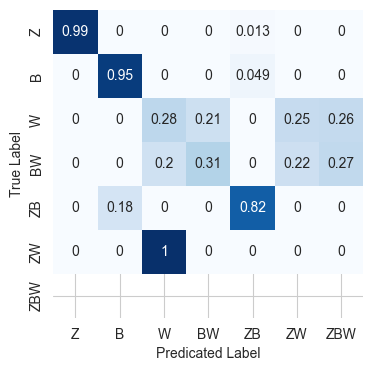

SNR -5
Accuracy = 0.6764705882352942


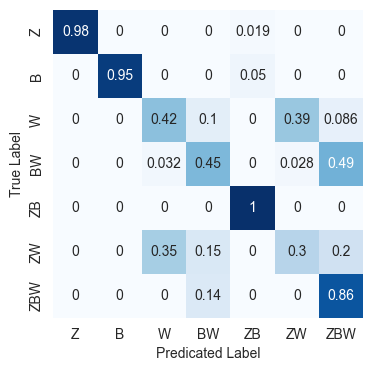

SNR 0
Accuracy = 0.834870848708487


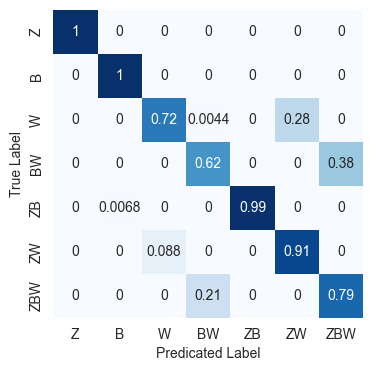

SNR 5
Accuracy = 0.95


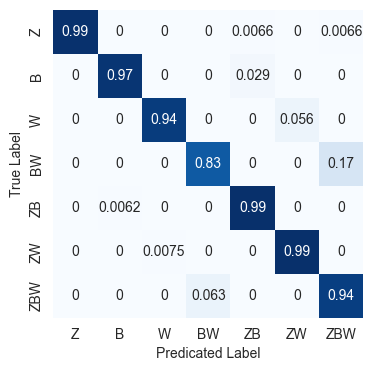

SNR 10
Accuracy = 0.9612546125461254


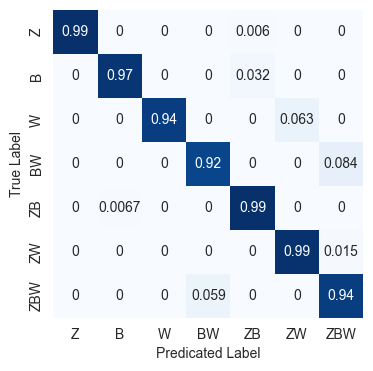

SNR 15
Accuracy = 0.9631675874769797


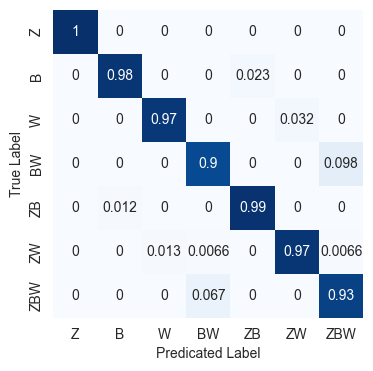

SNR 20
Accuracy = 0.9502868068833652


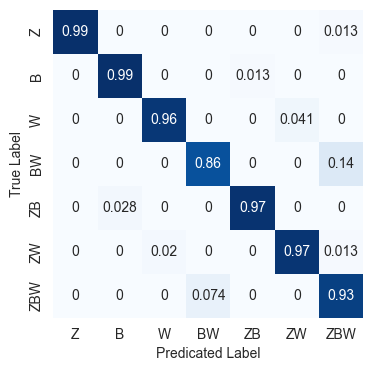

SNR 30
Accuracy = 0.9547689282202556


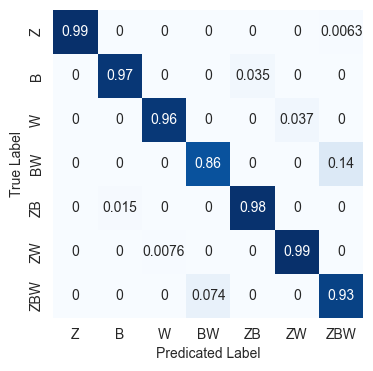

In [14]:

def calc_accuracy(y_test, predictions) -> float:
    return np.mean(np.asarray(y_test) == np.asarray(predictions))


confusion_matrix_snr = -100
confusion_matrix_result: SpectrumPaintingResult = results[confusion_matrix_snr]


def plot_confusion_matrix(y_test,
                          y_predictions,
                          label_names: List[str]):
    cm = confusion_matrix(y_test, y_predictions)
    row_sums = cm.sum(axis=1)[:, np.newaxis]

    cm = (cm.astype(np.float32) / row_sums)

    plt.figure(figsize=(4, 4))
    plot = heatmap(cm, xticklabels=label_names, yticklabels=label_names, annot=True, cmap='Blues', cbar=False)
    plot.get_figure()
    plt.ylabel('True Label')
    plt.xlabel('Predicated Label')
    plt.show()


def plot_confusion_matrix_standard_deviation(y_test: List[List[int]],
                                             y_predictions: List[List[int]],
                                             label_names: List[str]):
    cms = []

    for i in range(len(y_predictions)):
        cm = confusion_matrix(y_test[i], y_predictions[i])
        cm = (cm.astype('float') / cm.sum(axis=1)[:, np.newaxis])
        cms.append(cm)

    plt.figure(figsize=(3, 3))
    heatmap(np.std(cms, axis=0), cmap='Blues', annot=True, xticklabels=label_names, yticklabels=label_names,
            cbar=False)
    plt.ylabel('True Label')
    plt.xlabel('Predicated Label')
    plt.show()


print("Full model")
plot_confusion_matrix(confusion_matrix_result.get_all_full_model_labels(),
                      confusion_matrix_result.get_all_full_model_predictions(),
                      confusion_matrix_result.label_names)

# plot_confusion_matrix_standard_deviation(confusion_matrix_result.get_all_full_model_labels(),
#                       confusion_matrix_result.get_all_full_model_predictions(),
#                       confusion_matrix_result.label_names)

print("Lite model")
plot_confusion_matrix(confusion_matrix_result.get_all_lite_model_labels(),
                      confusion_matrix_result.get_all_lite_model_predictions(),
                      confusion_matrix_result.label_names)

y_full_accuracy = []
y_lite_accuracy = []
x_snr = []

for (snr, result) in results.items():
    x_snr.append(snr)

    y_test = result.get_all_lite_model_labels()
    predictions = result.get_all_lite_model_predictions()

    full_model_avg_accuracy = calc_accuracy(result.get_all_full_model_labels(), result.get_all_full_model_predictions())
    y_full_accuracy.append(full_model_avg_accuracy)

    lite_model_avg_accuracy = calc_accuracy(result.get_all_lite_model_labels(), result.get_all_lite_model_predictions())
    y_lite_accuracy.append(lite_model_avg_accuracy)

plt.bar(x=range(len(x_snr)),
        height=y_lite_accuracy,
        tick_label=x_snr)
plt.yticks(np.arange(0, 1, step=0.1))
plt.ylim((0, 1))
plt.ylabel("Accuracy")
plt.xlabel("SNR (dB)")
plt.show()

# Plot all confusion matrices
for (snr, result) in results.items():
    print(f"SNR {snr}")

    y_test = result.get_all_lite_model_labels()
    predictions = result.get_all_lite_model_predictions()

    avg_accuracy = calc_accuracy(y_test, predictions)
    print(f"Accuracy = {avg_accuracy}")

    plot_confusion_matrix(predictions, y_test, result.label_names)
    # plot_confusion_matrix_standard_deviation(result.full_model_predictions, result.full_model_labels, result.label_names)